# Business Problem

The startup company **"Landmark Airlines"** is embarking on the creation of a domestic airline dedicated to serving upper-class Americans and business executives. The company is currently focused on acquiring and operating airplanes for both commercial and private use. They are particularly interested in catering to the needs of private individuals or groups of executives who might require charter services. However, Landmark Airlines lacks sufficient knowledge regarding the potential risks associated with aircraft operations. It is our responsibility to assess and identify the aircraft options with the lowest risks, providing actionable insights for the head of the new aviation division. These insights will play a pivotal role in guiding the company's decisions regarding which aircraft to invest in for this promising new business venture.

## Key Objectives


- We will conduct an analysis that will result in three distinct and practical business recommendations. By addressing the challenges of handling missing data, aggregating information, and effectively visualizing the data, We aim to empower our organization to make informed decisions based on data. We will connect these findings to the realm of business intelligence, leveraging them to offer insightful suggestions on how our company should proceed with the exciting new aviation venture.

- We understand that effective communication is of paramount importance. Our capacity to deliver value to the organization, or to secure a position within it, hinges on our proficiency in articulating our accomplishments and their significance. Our task involves crafting a narrative that our stakeholders, specifically the head of the aviation division, can easily comprehend. We will achieve this by guiding them through each step of our process, emphasizing key insights, while condensing less critical details. This approach ensures that our message is clear, engaging, and allows our audience to seamlessly follow our storyline.

- We will utilize a variety of visualizations to enhance our communication. Visual representations play a crucial role in both exploring the data and making our findings easily understandable for individuals who may not have technical expertise. Within our presentation, we will shine a spotlight on visuals that directly align with the recommendations we're making. It's advisable to opt for uncomplicated visuals, such as bar charts and line graphs, as they tend to be the most effective. Additionally, we will pay careful attention to formatting, including elements like labels and titles, to ensure that our visuals are clear and impactful.

# Data Visualization

## Setting up the workspace

The best way to understand our dataset is to visualize it. Seaborn and Matplotlib are going to be incredibily helpful for this goal. Landmark Airlines needs 3 recomendations of aircrafts to invest in based on how safe the plane is. First we must define what a "safe" aircraft constitutes as.

Some ways we can determin the safety of an aircraft:
- Calculate the total fatality rate
- Fatality rate based on weather condition
- Extracting list of 50 makes most frequently involved in accidents
- Correlation map
- Days with most accidents
- At what stage do accidents happen

As Data Scientists, it is imperative that we represent this data is a clear way for business' to understand and make clear decisions based off of. We believe the above visualization will provide us with the clearest picture.

For starters we must import the nessecary libraries and csv file(s)

In [24]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#Ignoring ugly warnings
warnings.filterwarnings("ignore")

In [27]:
# Opening CSV file and assigning it to a Dataframe varrible
df = pd.read_csv('data/cleaned_aviation_data1.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)

In [28]:
# Reading the DataFrame
df

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Year,Month.Abbr,Day.Name.Abbr,City,State
0,Accident,1998-01-01,"CHANDLER, AZ",United States,Fatal,Destroyed,Airplane,Cessna,172M,1.0,...,0.0,0.0,VMC,Cruise,Probable Cause,1998.0,Jan,Thu,CHANDLER,AZ
1,Accident,1998-01-02,"MCGRATH, AK",United States,Non-Fatal,Destroyed,Airplane,Douglas,DC-6B,4.0,...,0.0,3.0,VMC,Takeoff,Probable Cause,1998.0,Jan,Fri,MCGRATH,AK
2,Accident,1998-01-02,"EVERGLADES CITY, FL",United States,Non-Fatal,Substantial,Airplane,Cessna,152,1.0,...,0.0,2.0,VMC,Landing,Probable Cause,1998.0,Jan,Fri,EVERGLADES CITY,FL
3,Accident,1998-01-02,"AUGUSTA, ME",United States,Non-Fatal,Substantial,Airplane,Cessna,172P,1.0,...,0.0,2.0,VMC,Taxi,Probable Cause,1998.0,Jan,Fri,AUGUSTA,ME
4,Accident,1998-01-02,"WESTPORT, OK",United States,Non-Fatal,Substantial,Airplane,Mooney,M20J,1.0,...,0.0,1.0,VMC,Approach,Probable Cause,1998.0,Jan,Fri,WESTPORT,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31797,Accident,2022-12-26,"Annapolis, MD",United States,Non-Fatal,NaN,Airplane,Piper,PA-28-151,NaN,...,0.0,0.0,NaN,NaN,NaN,2022.0,Dec,Mon,Annapolis,MD
31798,Accident,2022-12-26,"Hampton, NH",United States,NaN,NaN,Airplane,Bellanca,7ECA,NaN,...,0.0,0.0,NaN,NaN,NaN,2022.0,Dec,Mon,Hampton,NH
31799,Accident,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,American Champion Aircraft,8GCBC,1.0,...,0.0,1.0,VMC,NaN,NaN,2022.0,Dec,Mon,Payson,AZ
31800,Accident,2022-12-26,"Morgan, UT",United States,NaN,NaN,Airplane,Cessna,210N,NaN,...,0.0,0.0,NaN,NaN,NaN,2022.0,Dec,Mon,Morgan,UT


Okay now that weve managed to import and open the CSV file we can now start creating visualizations on the data that we have.

Before that lets get some information and understanding of the CSV file so we know which columns we want to use for our visualizations

In [29]:
# Gathing info on the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31802 entries, 0 to 31801
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      31802 non-null  object 
 1   Event.Date              31802 non-null  object 
 2   Location                31795 non-null  object 
 3   Country                 31802 non-null  object 
 4   Injury.Severity         31750 non-null  object 
 5   Aircraft.damage         30218 non-null  object 
 6   Aircraft.Category       30774 non-null  object 
 7   Make                    30773 non-null  object 
 8   Model                   30769 non-null  object 
 9   Number.of.Engines       29996 non-null  float64
 10  Engine.Type             28911 non-null  object 
 11  Purpose.of.flight       29134 non-null  object 
 12  Total.Fatal.Injuries    30774 non-null  float64
 13  Total.Serious.Injuries  30774 non-null  float64
 14  Total.Minor.Injuries    30774 non-null

In [33]:
# Lets make sure that we can claerly get affirmative data rather then any "Unavailable" data
injury_data = df[df['Injury.Severity'] != 'Unavailable']

## Creating the visualizations

To understand what is unsafe we must first understand what is safe. We have 35,000+ entries of data with very minimal missingness, which means we can comfortable calculate the average fatality rate for accidents within the United States. This will give us a comfortable understanding of what airplanes tend to end in more fatalities and which ones tend to be much safer and sustainable



In [34]:
# Calculate average fatality rate
averagefatal = len(injury_data[injury_data['Injury.Severity'] == 'Fatal'].index) / len(injury_data.index)
print("Average fatality rate: " + str(round(averagefatal * 100, 2)) + '%')

Average fatality rate: 16.75%


Okay so the average fatality rate in accidents within the USA is 16.75%, for the purpose of recommending a make and model to Landmark Airlines, anything above 20% will be automatically ruled out of judgement.

Now that we know the average fatality rate, we should calculate the average fatality rate per make. The best way to do that is to create a bar-graph of the top 25 most frequently crashed makes.



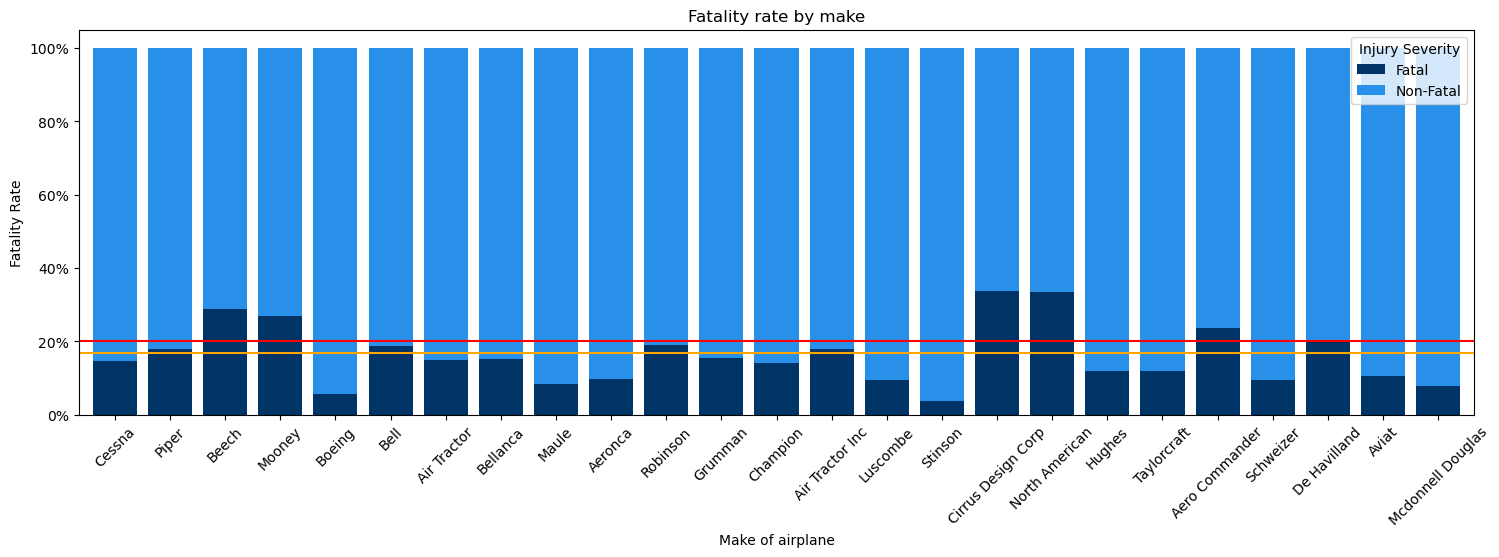

In [50]:
# Importing percent formatter
from matplotlib.ticker import PercentFormatter

#
make_top25 = df['Make'].value_counts().nlargest(25).index.tolist()

# Only keep data with a make in the top list
make_data = injury_data[injury_data['Make'].isin(make_top25)]

# Percentage fatality by make
makefatal = make_data.groupby('Make')['Injury.Severity'].value_counts(normalize = True).unstack('Injury.Severity').reindex(make_top25)
makefatal.plot.bar(stacked = True, figsize=(18,5), width = 0.8, color = ['#003366','#2990EA'])

# Line with average fatality
plt.axhline(y = averagefatal, color = 'orange', linestyle = '-')
plt.axhline(y = .20, color = 'r', linestyle = '-')

#Formatting
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Fatality rate by make')
plt.legend(title = "Injury Severity", loc='upper right')
plt.xticks(rotation=45)
plt.xlabel('Make of airplane')
plt.ylabel('Fatality Rate')
plt.show()

It looks like there 10 Companies above the average mortality rate in the United states. Now this doesnt mean we have to immediately get rid of them however it does give us something to look deeper into. The Orange line represents the average fatality whereas the red line represents 20% fatality rate. 20% fatality rate is completely unacceptable as it is too high risk for our stakeholders to approve. For that reason we can ignore :

- Beech
- Mooney
- Cirrus Design Corp
- North American
- Aero Commander
- De Havilland (We will consider this 20%)

The companies we should be catious of are:

- Piper
- Bell
- Robinson
- Air Tractor Inc
- Aero Commander

These companies require us to look more into the data behind each airplane and accident involved so that we can confidently make a recomendation off of safety

The current most promising three companies:

- Cessna
- Piper
- Bellanca

Certain companies actually do not meet our standards of flight, Boeing is a commerical airline which is too large scale for the business that our stakeholders are trying to run, despite the very aprovable safety metric. Some companies are helicopter based and some are simply defunct and would be too risky to support the idea of investing in.

Currently the best option at face value is likely to be the Cessna, It has the lowest fatality rate out of the other acceptable makes, as well as it has a extremely large data set comparaitive to the other datasets, meaning we for sure know that Cessnas have a very low rate of fatality.

